## Viral Spread Theory in RKnot ##

*RKnot* is built up from the contact level. A contact is an interaction between an infected person and a susceptible person that could result in transmission of the virus (more details [below](#Average-Contact)). Contacts occur in a 2d environment in which subjects move randomly according to pre-defined distributions or deterministically according to event subscription.

When a contact occurs, transmission is determined stochastically according to a multi-faceted likelihood of transmission tailored specifically to the infected and susceptible subjects in contact at the specific time at the specific location.

The expected number of new infections at any time, can be found as the sum of all contacts at that time multiplied each contact's specific transmission risk.

$$
\begin{equation}
E(n_{infs}) = \sum_{i=1}^N c_i*\tau_i
\end{equation}
$$

$\tau$ is a fundamental property of virus that can be further augmented for properties of the infected, or the subject, or the location of the contact.

$$
\begin{equation}
\tau_i = \tau * T_{inf,i} * T_{sus,i} * T_{loc,i}
\end{equation}
$$


Thus, the transmission risk of the virus is required in order to mimick its spread. This can be provided directly or derived from a virus' estimated $R_0$.

### $R_0$ ###
The propensity for a virus to spread is most-commonly referenced by its Initial Reproduction Number, $R_0$.

$R_0$ is essentially the number of new infections that will be caused by a single infected person in an entirely susceptible population. 

At an individual level, $R_0$ is influenced by many factors: the number of contacts the infected person has, the location of contacts, the social setting of contacts, etc.  

At a population level, many models of $R_0$ assume that the individual factors average out, thus leaving us with a property that is fundamental to the virus itself. We can see there is a broad range of $R_0$ values for different viruses in the [wikipedia entry](https://en.wikipedia.org/wiki/Basic_reproduction_number).

$R_0$ can be described as:

$$
\begin{equation}
R_0=\beta*d
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\beta \textit{ = transmission rate (infections / day)}\\ d \textit{ = duration of infection (days)}
\end{equation}
$$

The above ignores the number of contacts made, however,

$\beta$ can be further broken down as:

$$
\begin{equation}
\beta=\tau*\overline{c}
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\tau \textit{ = probability of transmission, or transmission risk}
\\\overline{c}\textit{ = contacts per day}
\end{equation}
$$
which yields:
$$
\begin{equation}
R_0=\tau*\overline{c}*d
\end{equation}
$$

Using the relationship above, we can simulate viral spread contact by contact, however, we must have a value(s) for $\tau$.

### Static Transmission Risk ###

There are many mathematical models used to describe viral transmission, the most commonly-referenced being the [SIR model](https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf) (Suscepitble-Infected-Recovered).

The SIR model makes several simplifying assumptions:

+ Closed, well-mixed population with no demography
+ Constant Rates

This allows viral spread to be described in 3 equations.

$$
\begin{equation}
\frac{ds}{dt} = −\beta si
\\\frac{di}{dt} = \beta si - id^{-1}
\\\frac{dr}{dt} = di
\end{equation}
$$
$$
\textit{where: }s = S/N = \textit{number of susceptible / total population size}
\\\textit{where: }i = I/N = \textit{number of infected / total population size}
\\\textit{where: }s = R/N = \textit{number of recovered / total population size}
$$

The simplified model allows for some quick estimates of various spread characteristics. Herd Immunity threshold, for instance, can be found as:

$$
\begin{equation}
\text{HIT} = 1 - 1/R_0 
\end{equation}
$$

For instance, $R_0$ of 2.5x, [the prevailing estimate for sars-cov-2](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html), yields a HIT of 60%.

The assumption of constant rates presents problems for simulating at the contact level, however. SIR assumes that transmission risk is constant during the infection period and that each subject in the population has the same number of contacts and so is able to ignore $\tau$ and $c$.

Referring to equation (5) above:

+ $R_0$ is known (from external analysis and provided by the user)
+ $d$ is known (from external analysis and provided by the user)

Thus, unknowns are    $\tau$ & $\overline{c}$

As per above, we must know $\tau$ in order to simulate spread.

#### Expected Contact Rate ####
While we do not know $\overline{c}$, the simulation space is given a number of parameters that allow us to estimate
the expected number of contacts. We know:

+ The population size
+ The number of locations
+ The movement patterns of subjects
+ The likelihood that a subject will be at a particular location at a particular time given 1/2/3 above
        
A simple method to estimate $\overline{c}$ is to assume that each subject is equally likely to be in any one location at any time. The probability of a single dot being in a singe location is:

$$
\begin{equation}
P(LOC_{xy},DOT_i)=1/N
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;xy\;\textit{= coordinates of the location}
\\N\textit{ = number of locations}
\end{equation}
$$ 
 
The probability of another dot being there at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N*1/N
\end{equation}
$$

The probability of $n$ dots being at the same location at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N^n
\end{equation}
$$

Then, the number of ordered contacts is:

$$
\begin{equation}
\sum_{n=1}^N(1 / N^n)
\end{equation}
$$

And for all possible orders:

$$
\begin{equation}
E(\overline{c})=\sum_{n=1}^N(1/N^n)*n
\end{equation}
$$

In [18]:
from rknot.helpers import md

c = expected_contacts(100, 100)
msg = 'The result is a contact rate that is closely related to the density '
msg += 'of the simulation space. For example, a population of 100 subjects '
msg += ' in a space of 100 locations, would have an expected contact rate of '
msg += '{:.2f} per day'.format(c)

md(msg)

The result is a contact rate that is closely related to the density of the simulation space. For example, a population of 100 subjects  in a space of 100 locations, would have an expected contact rate of 1.01 per day

#### Likelihood of Transmission ####

With the expected contact rate known, probability of transmission under the SIR model is found as:
$$
\begin{equation}
\tau=\frac{R_0}{𝑑*\overline{c}}
\end{equation}
$$

So, again, If a susceptible subject has contact with an infected at the same location, at any time,
its probability of infection is: 

$$
\begin{equation}
\tau_i = \tau * T_{inf,i} * T_{sus,i} * T_{loc,i}
\end{equation}
$$

If a susceptible comes in contact with multiple infected, we assume that this results in multiple contacts that occur in succession. So we must sum all the branches of the probability tree that end in an infection:

$$
\begin{equation}
\sum^N_{i=1}(1-\tau_i)^n*\tau_i
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;\tau_i\;\textit{= likelihood of transmission for contact i}
\\N\;\textit{= number of infected dots}
\end{equation}
$$

This ensures that the likelihood of transmission is asymptotic to 1, as follows:

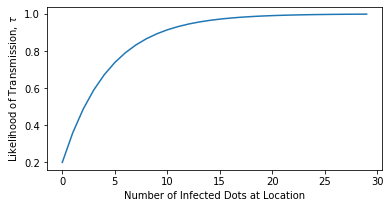

In [19]:
import numpy as np
import matplotlib.pyplot as plt

tmr = .2
xrng = np.arange(30)
y = ((1-tmr)**xrng*tmr).cumsum()

fig, ax = plt.subplots(figsize=(6,3))
plot = ax.plot(xrng, y)
ax.set_xlabel('Number of Infected Dots at Location')
ax.set_ylabel(r'Likelihood of Transmission, $\tau$')

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/tau_v_contacts.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/tau_v_contacts.png" alt="Drawing" style="width: 400px;" align="center"/>

### Dynamic Transmission Risk ###

The SIR model makes several assumptions that make for simpler math, but that do not map well onto reality. 

In particular, SIR assumes constant transmission risk, $$\tau$$, when in reality, we know that the infectiousness of an individual changes over time as a function of viral load. It takes time for the virus to accumulate in the subject and, then, in turn it takes time for the subject to dimish the virus via its immune response. 

Generally, the greater the viral load, the greater the transmission risk. And so the likelihood of transmission should follow a similar pattern as the viral load (or vice versa). This [New York Times piece](https://www.nytimes.com/interactive/2020/10/02/science/charting-a-coronavirus-infection.html?s=03) has a nice visualisation of this concept for sar-cov-2.

There are several techinques available for incorporating viral load in a viral spread model including serial interval, explored [here](https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf) and generation time, explored [here](https://www.medrxiv.org/content/10.1101/2020.03.08.20032946v1.full.pdf). These techniques, however, again tend to ignore $\overline{c}$ and focus on $\beta$.

A paper from a team at the [Fred Hutchinson Cancer Research Center](https://www.medrxiv.org/content/10.1101/2020.08.07.20169920v3.full.pdf), however, maps transmission risk directly onto an estimated viral load curve and infectiousness factor and optimizes it at a specfic contact rate and contact variance (hence forth known as the "Fred" model).

First, we will show how the dynamic transmission risk curve is derived. The goal is to produce an array of non-zero probabilites reflecting the likelihood of transmission of virus from one infected to a susceptible in a single contact, based on the known viral load characteristics of the virus.

The Fred model combines quantities of infectiousness and viral load. Viral load is found via a system of 6 differential equations as follows:

$$
\begin{equation}
\frac{ds}{dt} = -\beta vs
\\\frac{di}{dt} = \beta vs - \delta i^ki - mi\frac{e^r}{e^r+\phi^r}
\\\frac{dv}{dt} = \pi i - \gamma v
\\\frac{dM_1}{dt} = \omega iM_1 - qM_1
\\\frac{dM_2}{dt} = q(M_1 - M_2)
\\\frac{de}{dt} = q(M_2 - \delta_eE
\end{equation}
$$

The variable `v` is the viral load.

With viral load known, the transmission risk, $\tau$, can be found as:

$$
\begin{equation}
\tau_t = \frac{v(t)^\alpha}{\gamma^\alpha + v(t)^\alpha}
\end{equation}
$$

The paper provides estimates for several of the parameters including $\gamma$, $\alpha$, etc. The system can be described and solved using the `odeint` method in `scipy`.

In [28]:
import math
import numpy as np
from scipy.integrate import odeint

def inf_rate(beta,v,s):
    return beta*v*s

def sfunc(beta, v, s):
    return -inf_rate(beta, v, s)

def vfunc(pi,i,c,v):
    return pi*i - c*v

def ifunc(beta, v, s, delta, i, k, m, e, r, phi):
    inf_r = inf_rate(beta,v,s)
    dens_rate = delta*(i**k)
    acq_res = (m * e**r) / (e**r + phi**r)
    return inf_r - dens_rate*i - acq_res*i

def m1func(omega, i, m1, q):
    return omega*i*m1 - q*m1

def m2func(q, m1, m2):
    return q * (m1-m2)

def efunc(q, m2, dE, e):
    return q*m2 - dE*e

def model(z,t):
    beta=10**-7.23
    k=0.08
    delta= 3.13
    pi=10**2.59
    m=3.21
    omega=10**-4.55
    r=10
    dE=1
    q=2.4*10**-5
    c=15
    
    s, i, v, m1, m2, e = z[0], z[1], z[2], z[3], z[4], z[5]
    
    dsdt = sfunc(beta, v, s)
    didt = ifunc(beta, v, s, delta, i, k, m, e, r, phi)
    dvdt = vfunc(pi,i,c,v)
    dm1dt = m1func(omega, i, m1, q)
    dm2dt = m2func(q, m1, m2)
    dedt = efunc(q, m2, dE, e)
    
    dzdt = [dsdt,didt,dvdt,dm1dt,dm2dt,dedt]
    return dzdt

# FROM PRIOR RESEARCH
pi=10**2.59
c = 15
S0=10**7
I0=1
V0=pi*I0/c
M10=1
M20=0
E0=0
phi=100
z0 = [S0, I0, V0, M10, M20, E0]

t = np.linspace(0,20,30*4)

z = odeint(model,z0,t)
v= z[:, 2]

This results in the curve below, which shows the level of virus present in an infected person over time.

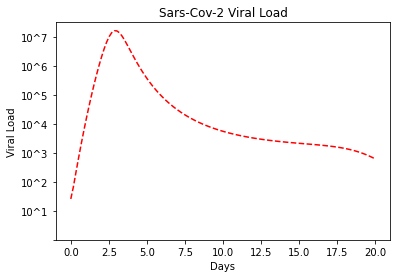

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t, np.log10(v),'r--')
ax.set_ylabel('Viral Load')
ax.set_xlabel('Days')
max_mag = math.floor(math.log(1.67*10**7, 10))
ax.set_yticks([np.log10(10**i) for i in range(0, max_mag + 1)])
ax.set_yticklabels([''] + [f'10^{i+1}' for i in range(0, max_mag)])
ax.set_title('Sars-Cov-2 Viral Load')
plt.show()

We can see that sars-cov-2 viral load has a long tail, however, the Hutch paper showed that the amount of virus present during the tail is unlikely to result in high transmission, as per below.

Transmission risk is derived from the viral load above as well as two properties of the infectiousness of the subjects in the contact, $\alpha$ and $\gamma$ (see the paper for more details).

The paper estimated $\alpha$ = 0.8 and $\gamma$ = $10^7$.

In [34]:
def infness(v, alpha, gamma):
    num = v**alpha
    den = gamma**alpha + v**alpha
    return num/den

def taufunc(v, alpha, gamma):
    return infness(v, alpha, gamma)**2

alpha = 0.8
gamma = 10**7

vlin = np.linspace(1, 10**10, 10**5)
tmr = taufunc(vlin, alpha, gamma)

`tmr` is the transmission risk curve that we will utilize in our simulations. It is a 1d array with each element representing the likelihood of transmission of the virus at that point in the infection's life cycle.

We can see from the plot below, that transmission risk only increases materially at exponentially higher viral loads:

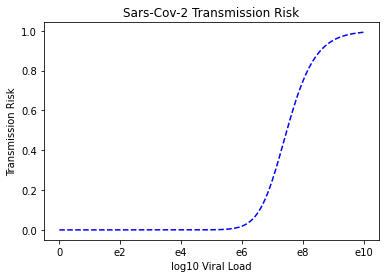

In [35]:
fig, ax = plt.subplots()
ax.plot(np.log10(vlin), tmr,'b--')
ax.set_ylabel('Transmission Risk')
ax.set_xlabel('log10 Viral Load')

ticks = ['0'] + [f'e{i*2}' for i in range(1, 6)]
ax.set_xticks([i*2 for i in range(len(ticks))])
ax.set_xticklabels(ticks)
ax.set_title('Sars-Cov-2 Transmission Risk')
plt.show()

We can further combine Chart 1 and Chart 2 above to show that transmission of sars-cov-2 is likely only during a very narrow range in the early stage of infection.

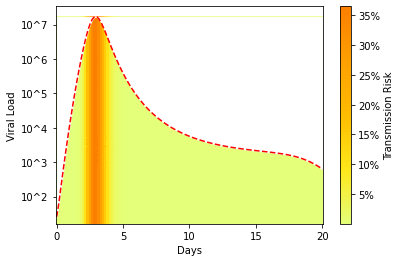

In [36]:
tmr = taufunc(v, alpha, gamma)

fig, ax = plt.subplots()
ax.plot(t, np.log10(z[:,2]),'r--')
ax.set_ylabel('Viral Load')
ax.set_xlabel('Days')
max_mag = math.ceil(np.log10(z[:,2]).max())
ax.set_yticks([np.log10(10**i) for i in range(0, max_mag)])
ax.set_yticklabels([''] + [f'10^{i+1}' for i in range(0, max_mag - 1)])

c = ax.pcolormesh(
    t, np.log10(z[:,2]), np.tile(tmr*100, (120,1)), 
    cmap='Wistia', vmin=tmr.min()*100, vmax=tmr.max()*100,
    shading='auto'
)
cbar = fig.colorbar(c, ax=ax, format='%.0f%%')
cbar.ax.set_ylabel('Transmission Risk', rotation=90)

ax.fill_between(t, np.log10(z[:,2]), np.log10(z[:,2]).max(), interpolate=True, color='w')

plt.show()

Note that there is only a significant risk of transmission of the virus for during the first few days of the infection period (shown as the more orange color under the curve).

Given the transmission risk curve, the probability $\tau$ that an infection will occur during a contact is:

$$
\begin{equation}
\tau_t
\\\textit{where: }t\textit{ = time since the infection occured}
\end{equation}
$$

With respect to multiple infected at a single location, we have to make a slight tweak to the prior equation 14 above.

Again, we sum all the branches of the probability tree that end in an infection. For each branch, the likelihood of terminating in an infection is the cumulative productive of the likelihood that each prior contact will *not* result an infection times the likelihood that the current contact *will* result in an infection.

$$
\begin{equation}
\sum^n_{i=1}(\tau_{it}*\prod^{i-1}_{j=0}(1-\tau_{jt}))
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;\tau_0=0
\\\tau\;\textit{= likelihood of transmission for dot i at time t}
\\t\;\textit{= time since infection occured for dot i}
\\n\;\textit{= number of infected dots}
\end{equation}
$$

If we assume random $\tau$ values from `tmr` curve above for 30 different infected dots, the likelihood of transmission to a susceptible as a function of the number of dots at the same location, scales as follows:

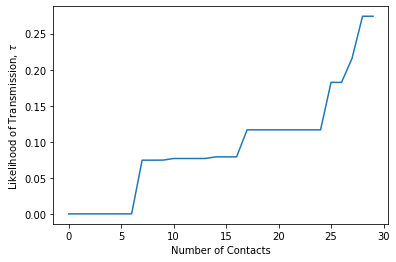

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from rknot.dots.fhutch import tmr

n=30
tmrs = np.random.choice(tmr, size=30)
xrng = np.arange(30)

survival = (1 - tmrs).cumprod()
survival = np.roll(survival, 1)
survival[0] = 1   

probs = np.zeros(n)
for i in range(n):
    probs[i] = survival[i]*tmrs[i]

y = probs.cumsum()

fig, ax = plt.subplots()
plot = ax.plot(xrng, y)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel(r'Likelihood of Transmission, $\tau$')

plt.show()

### Other Forms of Heterogeneity ###
**RKnot** seeks to address the shortfalls in $R_0$ models by allowing the user to introduce customized, heterogeneous populations across several axis including:

+ **Fatality Rate**
+ **Population Density**
+ **Movement** - frequency and distance of location changes in space according to different probability distributions.
+ **Events** - in the real world, people do not move and interact according to smooth probability functions. In fact, they typically have a small subset of movements that are huge outliers from any distribution. These are the professional sporting events, vacation trips, church functions, house parties, etc. that are scheduled and often times recurring. Thankfully, they are more often than not deterministic, which allows us to incorporate them in a simulation.
+ **Susceptibility** - segments of population can be made immune (without requiring vaccination) to mimick phenomenon like [possible T-cell immunity](https://www.bmj.com/content/370/bmj.m3563).
+ **Subject Transmission Factor**, $T_i$: $R_0$ assumes that all contacts have the same transmission risk, $\tau$ (subject to the viral load at the time of the interaction). **RKnot** introduces a unitless Transmission Factor, $T$, for each subject at each contact that can modulate $\tau$. This can be used to mimick social distancing or mask wearing or different socio-cultural norms that may impact spread (i.e. east Asian bows versus southern European double-kisses).

*Still To Be Incorporated*

+ **Location Transmission Factor**, $T_{\text{xy}}$: similar to $T_i$ above, we can introduce a transmission factor to specific locations that might result in higher or lower likelihood of spread. This could be used to simulate certain work environments (like enclosed office spaces or meat-packing plants). It can also be used to mimic seasonality, by changing $T_{xy}$ over time to account for, say, more time outdoors in temperate seasons.
+ **Testing and Isolation** - with the heightened awareness of a pandemic, individuals in population are more likely to self-isolate or quarantine themselves upon sympton onset, thereby helping to reduce spread.

### The Average Contact ###
Currently, **RKnot** assumes that each and every contact is an *Average Contact*. 

The average contact is a purely theoretical interaction that would result in about an average likelihood of transmission relative to all other possible interactions. It is not influenced by external factors such as the demographics of the subjects, the properties of the location, etc. Thus, the $\tau$ of an Average Contact is a fundamental property of the virus.

I like to think of the Average Contact as the *Elevator Case*, i.e.:

* Two people on an elevator, standing three feet apart, having a conversation for several minutes before one person exits. No masks nor other conscious social distancing, but no particularly reckless behaviour either.

Every other conceivable interaction can now be scaled relative to the Elevator Case on a continuum of higher or lower probability of transmission using transmission factors, $T$. For instance:

* two college students pressed closely together on a concert floor and yelling at the band on stage would have $T >>> 1x$
* two people standing in a open field, 6 feet apart with masks on exchanging limited pleasantries would have $T <<< 1x$

***
### References ###
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3782273/
+ https://www.bmj.com/content/370/bmj.m3563
+ https://www.medrxiv.org/content/10.1101/2020.06.28.20142190v1
+ https://fivethirtyeight.com/features/without-a-vaccine-herd-immunity-wont-save-us/
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3935673/
+ https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1804098/
+ https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf
+ https://www.nytimes.com/interactive/2020/10/02/science/charting-a-coronavirus-infection.html?s=03
+ https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf
+ https://www.medrxiv.org/content/10.1101/2020.03.08.20032946v1.full.pdf

In [ ]:
%%javascript
IPython.notebook.save_notebook()

In [51]:
from rknot.helpers import move_to_doc_folder
move_to_doc_folder('theory.ipynb')